<a href="https://colab.research.google.com/github/Sidhchamp1/Covid-19/blob/main/Copy_of_test_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hypothesis: Countries with higher vaccination rates saw a statistically significant reduction in deaths per confirmed case (case fatality ratio) compared to countries with lower vaccination rates.**

# Cleaning and Visualizing the data:


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

# Load the dataset
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
covid_recovery_df = pd.read_csv(url)
covid_recovery_df



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#get all dat columns in separate df
date_df = covid_recovery_df.iloc[:,4:]
date_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#convert dates to proper date time format
date_df.columns = pd.to_datetime(date_df.columns)
date_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2023-02-28,2023-03-01,2023-03-02,2023-03-03,2023-03-04,2023-03-05,2023-03-06,2023-03-07,2023-03-08,2023-03-09
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#group columns by year and aggregate
date_df = date_df.groupby(date_df.columns.year, axis=1).sum()
date_df.head()

,2020,2021,2022,2023
0,5998314,12291566,0,0
1,1999772,20652880,0,0
2,7142836,18527397,0,0
3,553171,2532478,0,0
4,649173,5246627,0,0


In [ ]:
#make a copy of date_df and add back the first 4 columns of the original df
df = date_df.copy()
df

,2020,2021,2022,2023
0,5998314,12291566,0,0
1,1999772,20652880,0,0
2,7142836,18527397,0,0
3,553171,2532478,0,0
4,649173,5246627,0,0
...,...,...,...,...
269,6750134,50858639,0,0
270,0,0,0,0
271,220558,551939,0,0
272,2229469,19623327,0,0


COVID GLOBAL CASES

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score


url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

covid_Cases_global_df = pd.read_csv(url)
covid_Cases_global_df.head()





,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [ ]:
#get all dat columns in separate df
date_df = covid_Cases_global_df.iloc[:,4:]
date_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [ ]:
date_df.columns = pd.to_datetime(date_df.columns)
date_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2023-02-28,2023-03-01,2023-03-02,2023-03-03,2023-03-04,2023-03-05,2023-03-06,2023-03-07,2023-03-08,2023-03-09
0,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [ ]:
date_df = date_df.groupby(date_df.columns.year, axis=1).sum()
date_df.head()

,2020,2021,2022,2023
0,8501751,39518380,67783564,14184774
1,3727544,51106141,108004674,22724295
2,10583375,57172988,96532073,18453214
3,682822,5084330,15527738,3252635
4,1343410,14797145,36733077,7151571


In [ ]:
df = date_df.copy()
df

,2020,2021,2022,2023
0,8501751,39518380,67783564,14184774
1,3727544,51106141,108004674,22724295
2,10583375,57172988,96532073,18453214
3,682822,5084330,15527738,3252635
4,1343410,14797145,36733077,7151571
...,...,...,...,...
284,8753200,115974691,239996301,47819504
285,0,0,178082,36380
286,382306,2403947,4280922,812260
287,2433883,52593029,117791992,23134779


COVID DEATHS GLOBAL

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score


url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

covid_Deaths_global_df = pd.read_csv(url)
covid_Deaths_global_df.head()



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [ ]:
#get all dat columns in separate df
date_df = covid_Deaths_global_df.iloc[:,4:]
date_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,0,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,0,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,0,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,0,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,0,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,0,0,0,0,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [ ]:
#convert dates to proper date time format
date_df.columns = pd.to_datetime(date_df.columns)
date_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2023-02-28,2023-03-01,2023-03-02,2023-03-03,2023-03-04,2023-03-05,2023-03-06,2023-03-07,2023-03-08,2023-03-09
0,0,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,0,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,0,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,0,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [ ]:
#group columns by year and aggregate
date_df = date_df.groupby(date_df.columns.year, axis=1).sum()
date_df.head()

,2020,2021,2022,2023
0,296447,1778958,2810220,535810
1,88375,871276,1281171,244558
2,377806,1563862,2491699,467908
3,15492,44641,55837,11220
4,36818,368673,695036,131307


In [ ]:
#make a copy of date_df and add back the first 4 columns of the original df
df = date_df.copy()
df

,2020,2021,2022,2023
0,296447,1778958,2810220,535810
1,88375,871276,1281171,244558
2,377806,1563862,2491699,467908
3,15492,44641,55837,11220
4,36818,368673,695036,131307
...,...,...,...,...
284,74921,1251129,2040515,388144
285,0,0,0,0
286,108944,480906,778784,146812
287,53042,849928,1453709,275043


This is the code for visualizing the correlation between recovery and the number of deaths per year: it demonstrates that there were no recoveries but there were a lot of deaths noticed as well

Visualization for comparing the vaccination with the total deaths

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vaccination_df = pd.read_csv(url)
vaccination_df.head()


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [ ]:
vaccination_df = vaccination_df.drop(columns=["iso_code"])



Visualizing the correlation between the deaths and the vaccinations per country.

In [ ]:
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
deaths_df = pd.read_csv(url_deaths)
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [ ]:
url_vaccinations = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vaccination_df = pd.read_csv(url_vaccinations)
vaccination_df

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196241,Zimbabwe,ZWE,2022-10-05,12219760.0,6436704.0,4750104.0,1032952.0,NaN,2076.0,74.87,39.44,29.11,6.33,127.0,638.0,0.004
196242,Zimbabwe,ZWE,2022-10-06,NaN,NaN,NaN,NaN,NaN,1714.0,NaN,NaN,NaN,NaN,105.0,563.0,0.003
196243,Zimbabwe,ZWE,2022-10-07,NaN,NaN,NaN,NaN,NaN,1529.0,NaN,NaN,NaN,NaN,94.0,462.0,0.003
196244,Zimbabwe,ZWE,2022-10-08,NaN,NaN,NaN,NaN,NaN,1344.0,NaN,NaN,NaN,NaN,82.0,361.0,0.002


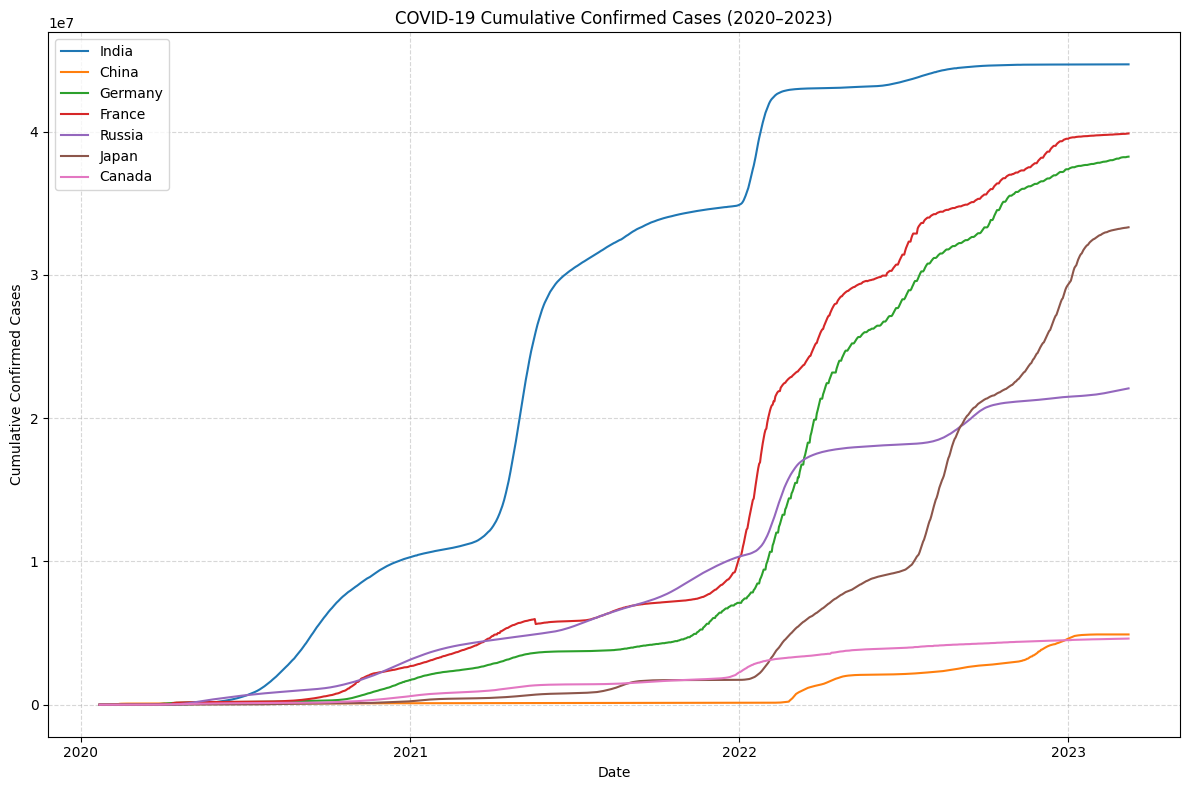

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load confirmed cases data
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed = pd.read_csv(url)

# Focus countries
countries = ['India', 'China', 'Germany', 'France', 'Russia', 'Japan', 'Canada']

# Clean and reshape
confirmed = confirmed.drop(['Lat', 'Long', 'Province/State'], axis=1)
confirmed = confirmed.groupby("Country/Region").sum()
confirmed = confirmed.loc[countries].T

# Convert index to datetime
confirmed.index = pd.to_datetime(confirmed.index)

# Filter for years 2020 to 2023
confirmed = confirmed[(confirmed.index >= "2020-01-01") & (confirmed.index <= "2023-12-31")]

# Plot
plt.figure(figsize=(12, 8))
for country in confirmed.columns:
    plt.plot(confirmed.index, confirmed[country], label=country)

plt.title("COVID-19 Cumulative Confirmed Cases (2020–2023)")
plt.xlabel("Date")
plt.ylabel("Cumulative Confirmed Cases")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Format x-axis to show annual ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


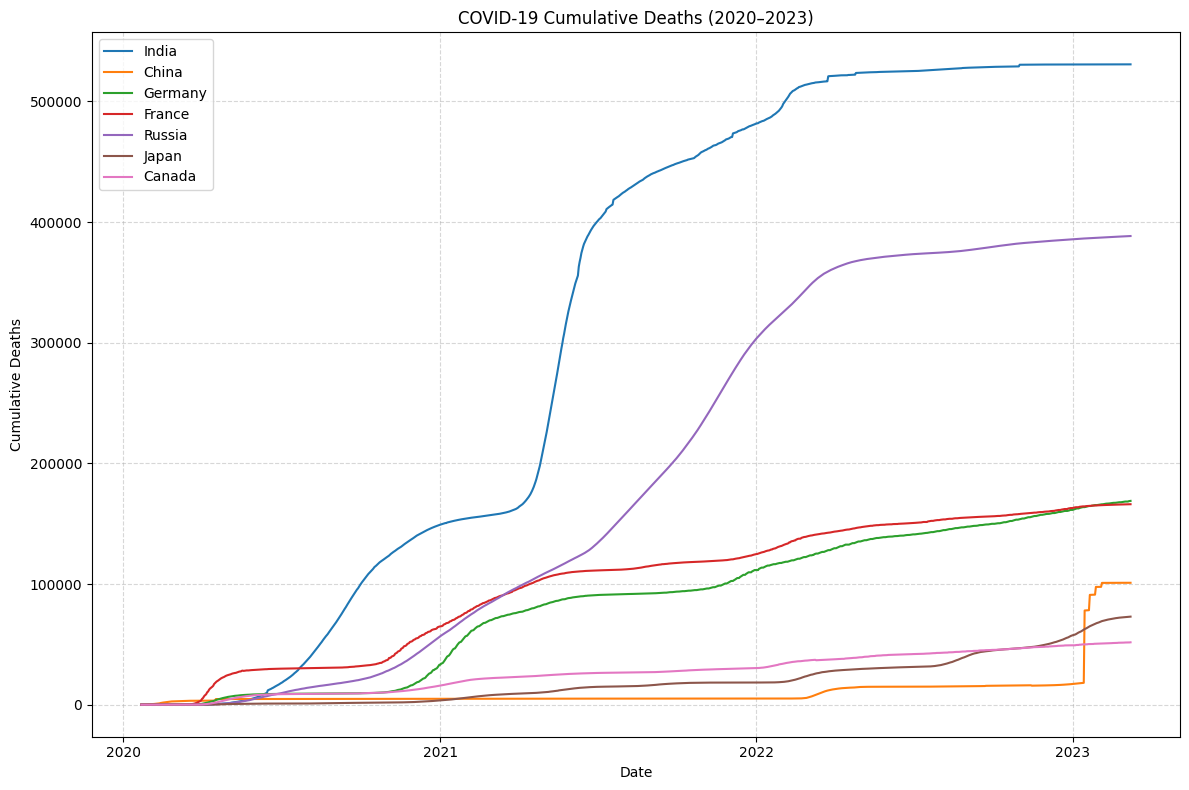

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load deaths data
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
deaths = pd.read_csv(url)

# Focus countries
countries = ['India', 'China', 'Germany', 'France', 'Russia', 'Japan', 'Canada']

# Clean and reshape
deaths = deaths.drop(['Lat', 'Long', 'Province/State'], axis=1)
deaths = deaths.groupby("Country/Region").sum()
deaths = deaths.loc[countries].T

# Convert index to datetime
deaths.index = pd.to_datetime(deaths.index)

# Filter for years 2020 to 2023
deaths = deaths[(deaths.index >= "2020-01-01") & (deaths.index <= "2023-12-31")]

# Plot
plt.figure(figsize=(12, 8))
for country in deaths.columns:
    plt.plot(deaths.index, deaths[country], label=country)

plt.title("COVID-19 Cumulative Deaths (2020–2023)")
plt.xlabel("Date")
plt.ylabel("Cumulative Deaths")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Format x-axis to show annual ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


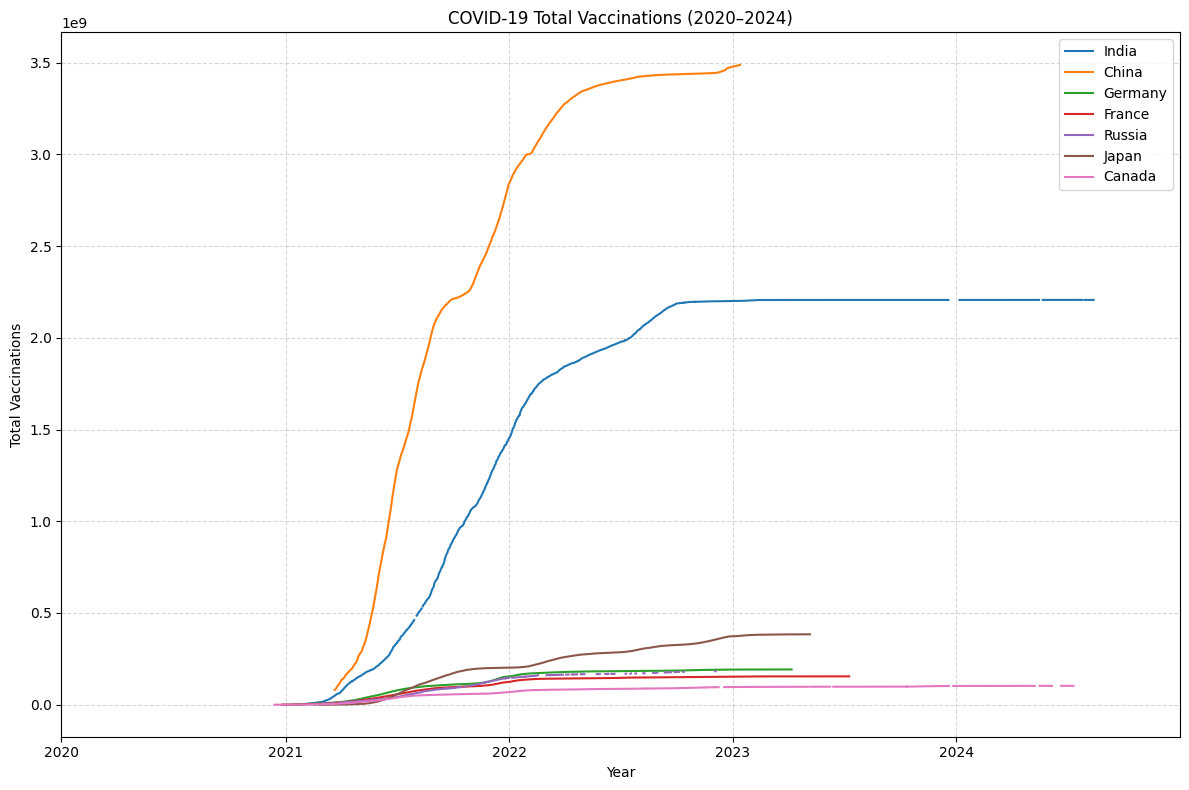

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load vaccinations data
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vax = pd.read_csv(url)

# Focus countries
countries = ['India', 'China', 'Germany', 'France', 'Russia', 'Japan', 'Canada']

# Filter dataset
vax = vax[vax['location'].isin(countries)]

# Convert date to datetime
vax['date'] = pd.to_datetime(vax['date'])

# Filter date range from 2020 to 2024
vax = vax[(vax['date'] >= "2020-01-01") & (vax['date'] <= "2024-12-31")]

# Pivot: rows = date, columns = country, values = total vaccinations
vax_pivot = vax.pivot(index='date', columns='location', values='total_vaccinations')

# Plot
plt.figure(figsize=(12, 8))
for country in countries:
    plt.plot(vax_pivot.index, vax_pivot[country], label=country)

plt.title("COVID-19 Total Vaccinations (2020–2024)")
plt.xlabel("Year")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis to show one tick per year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlim(pd.to_datetime("2020-01-01"), pd.to_datetime("2024-12-31"))

plt.tight_layout()
plt.show()


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# URLs
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_vax = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"

# Load deaths data for all countries
deaths = pd.read_csv(url_deaths)
deaths = deaths.drop(columns=['Lat', 'Long', 'Province/State'], errors='ignore')
deaths = deaths.groupby('Country/Region').sum()
deaths = deaths.T
deaths.index = pd.to_datetime(deaths.index)
deaths = deaths[deaths.index.year.isin([2020, 2021, 2022, 2023, 2024])]

def compute_annual(df):
    annual = df.resample('Y').max()
    annual = annual.diff().fillna(annual)
    annual.index = annual.index.year
    return annual

annual_deaths = compute_annual(deaths)
total_deaths = annual_deaths.loc[2020:2024].sum()

# Load vaccination data for all countries
vax = pd.read_csv(url_vax)
vax['date'] = pd.to_datetime(vax['date'])
vax['year'] = vax['date'].dt.year
vax = vax[vax['year'].isin([2020, 2021, 2022, 2023, 2024])]
annual_vax = vax.groupby(['location', 'year'])['total_vaccinations'].max().unstack().fillna(0)
total_vax = annual_vax.loc[:, 2020:2024].sum(axis=1)

# Combine deaths and vaccinations into one DataFrame, aligning country names
df_compare = pd.DataFrame({
    'Deaths': total_deaths,
    'Vaccinations': total_vax
}).reset_index().rename(columns={'Country/Region': 'Country', 'location': 'Country'})

# Drop countries with no deaths or vaccinations reported
df_compare = df_compare.dropna(subset=['Deaths', 'Vaccinations'])

# Filter countries where vaccinations < deaths
df_low_vax = df_compare[df_compare['Vaccinations'] < df_compare['Deaths']]

print(f"Number of countries where vaccinations < deaths: {len(df_low_vax)}")

if df_low_vax.empty:
    print("No countries found where total vaccinations are less than total deaths.")
else:
    # Replace zeros with 1 for log scale plotting
    df_low_vax['Deaths'] = df_low_vax['Deaths'].replace(0, 1)
    df_low_vax['Vaccinations'] = df_low_vax['Vaccinations'].replace(0, 1)

    # Plot
    fig, ax = plt.subplots(figsize=(14, 8))
    bar_width = 0.35
    indices = np.arange(len(df_low_vax))

    ax.bar(indices - bar_width/2, df_low_vax['Deaths'], width=bar_width, label='Deaths')
    ax.bar(indices + bar_width/2, df_low_vax['Vaccinations'], width=bar_width, label='Vaccinations')

    ax.set_xticks(indices)
    ax.set_xticklabels(df_low_vax['Country'], rotation=90)
    ax.set_ylabel('Total Count (2020-2024)')
    ax.set_title('Countries where Vaccinations are Lower than Deaths (2020-2024)')
    ax.set_yscale('log')
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


Number of countries where vaccinations < deaths: 0
No countries found where total vaccinations are less than total deaths.


# P value and t testing


In [ ]:
print(deaths_df.columns)
deaths_df

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [ ]:
vaccination_df.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'daily_vaccinations_per_million', 'daily_people_vaccinated',
       'daily_people_vaccinated_per_hundred'],
      dtype='object')

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# step 1: load data
vax_df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")
deaths_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

# step 2: make subsets (EXACT SAME FORMAT)
india_vax_lengths = vax_df[vax_df['location'] == 'India']['total_vaccinations'].diff().dropna()
india_deaths_lengths = deaths_df[deaths_df['Country/Region'] == 'India'].iloc[:, 4:].sum().diff().dropna()

# step 3: t-test
t_stat, p_val = ttest_ind(india_vax_lengths, india_deaths_lengths)

print(t_stat)
print(p_val)


21.64104501142267
6.835929566716897e-95


# Statistical analysis

In [ ]:
import pandas as pd

# URLs for COVID-19 datasets
cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recoveries_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
vaccinations_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"

# Load data
cases_df = pd.read_csv(cases_url)
deaths_df = pd.read_csv(deaths_url)
recoveries_df = pd.read_csv(recoveries_url)
vax_df = pd.read_csv(vaccinations_url)


In [ ]:
# Clean and aggregate time series data
def latest_country_totals(df):
    df = df.drop(['Lat', 'Long', 'Province/State'], axis=1)
    return df.groupby('Country/Region').sum().iloc[:, -1]  # Get most recent date

# Get latest totals
cases = latest_country_totals(cases_df)
deaths = latest_country_totals(deaths_df)
recoveries = latest_country_totals(recoveries_df)

# Latest vaccinations
latest_vax = vax_df.sort_values('date').drop_duplicates('location', keep='last')
vaccinations = latest_vax.set_index('location')['total_vaccinations']

# Combine all into one DataFrame
df = pd.concat([cases, recoveries, deaths], axis=1)
df.columns = ['Cases', 'Recoveries', 'Deaths']
df = df.join(vaccinations.rename('Vaccinations'))
df = df.dropna()  # Remove rows with missing data


In [ ]:
from sklearn.model_selection import train_test_split

# Independent (X) and Dependent (y) variables
X = df[['Cases', 'Recoveries', 'Vaccinations']]
y = df['Deaths']

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
# Initialize the model
model = LinearRegression()


Mean Squared Error: 154013862.88050628
R² Score: 0.9031036144195774


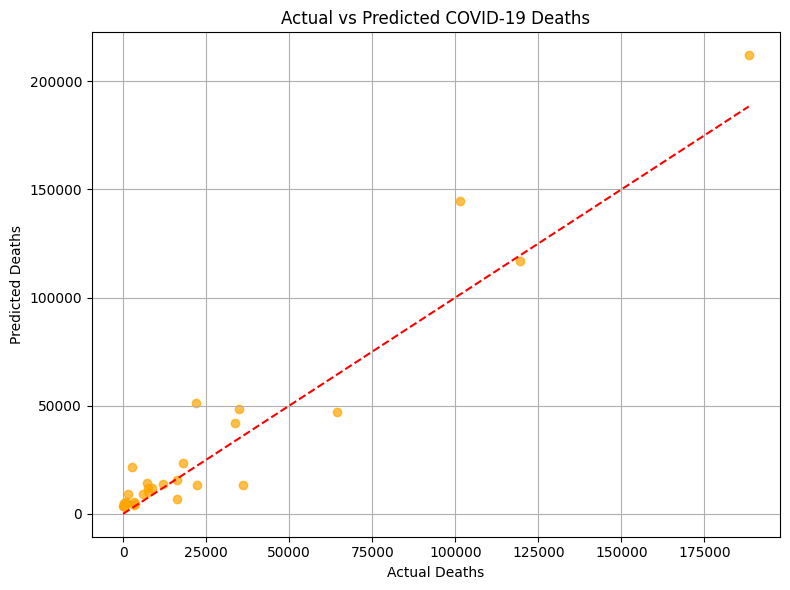

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Train (fit) the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Deaths")
plt.ylabel("Predicted Deaths")
plt.title("Actual vs Predicted COVID-19 Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# URLs
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
vaccinations_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"

# Load data
deaths_df = pd.read_csv(deaths_url)
vax_df = pd.read_csv(vaccinations_url)


In [ ]:
# Prepare deaths: latest total deaths per country
deaths_df = deaths_df.drop(['Lat', 'Long', 'Province/State'], axis=1)
deaths = deaths_df.groupby('Country/Region').sum().iloc[:, -1]
deaths.name = 'Deaths'

# Prepare vaccinations: most recent total vaccinations per country
latest_vax = vax_df.sort_values('date').drop_duplicates('location', keep='last')
vaccinations = latest_vax.set_index('location')['total_vaccinations']
vaccinations.name = 'Vaccinations'

# Combine
df = pd.concat([deaths, vaccinations], axis=1)
df = df.dropna()


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Vaccinations']]
y = df['Deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model= LinearRegression()

Mean Squared Error: 1311935647.726688
R² Score: 0.1746079216423796


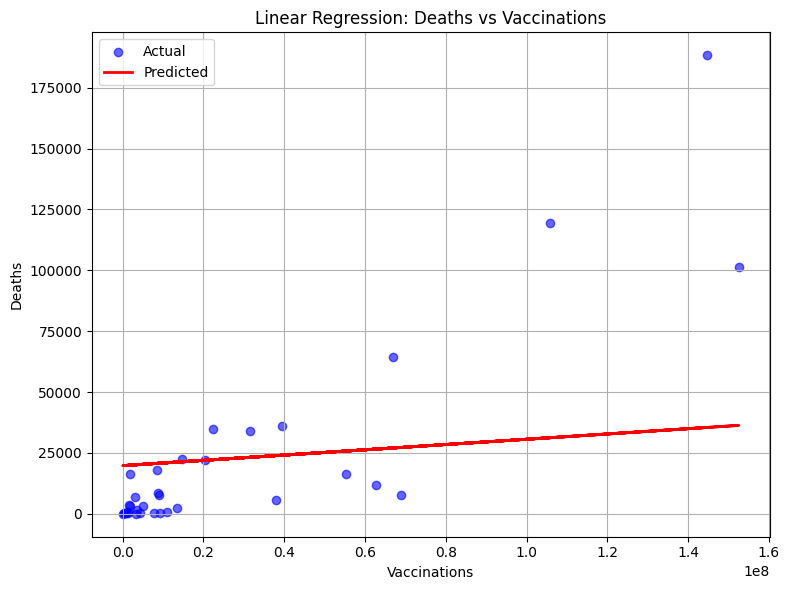

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Vaccinations")
plt.ylabel("Deaths")
plt.title("Linear Regression: Deaths vs Vaccinations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Mean Squared Error: 1907014694.1452243
R² Score: -0.41352168640257236


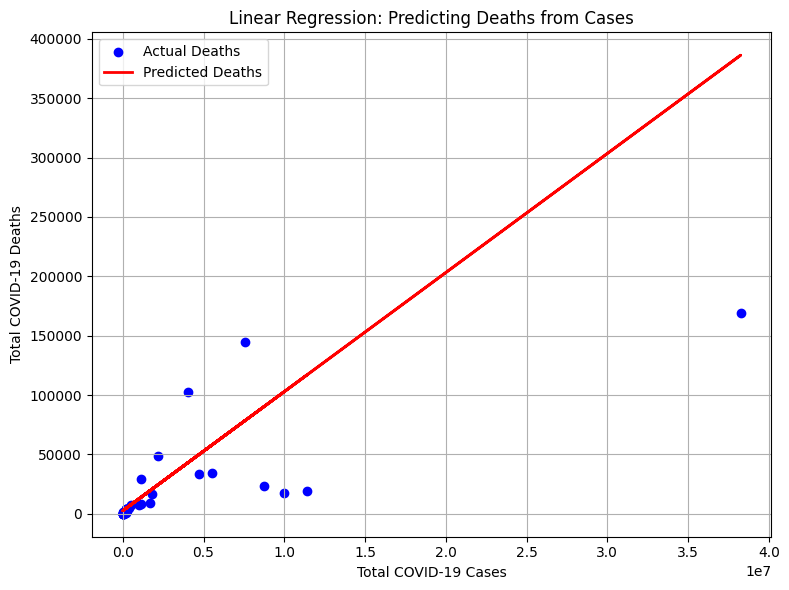

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# --- Step 1: Load data ---
cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

cases_df = pd.read_csv(cases_url)
deaths_df = pd.read_csv(deaths_url)

# --- Step 2: Clean and prepare data ---
cases_df = cases_df.drop(['Lat', 'Long', 'Province/State'], axis=1)
deaths_df = deaths_df.drop(['Lat', 'Long', 'Province/State'], axis=1)

cases_total = cases_df.groupby('Country/Region').sum().iloc[:, -1]
deaths_total = deaths_df.groupby('Country/Region').sum().iloc[:, -1]

df = pd.concat([cases_total, deaths_total], axis=1)
df.columns = ['Cases', 'Deaths']
df = df.dropna()

# --- Step 3: Train-test split ---
X = df[['Cases']]
y = df['Deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Train model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Step 5: Predict and evaluate ---
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# --- Step 6: Visualize ---
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Deaths')
plt.plot(X_test, y_pred, color='red', label='Predicted Deaths', linewidth=2)
plt.xlabel("Total COVID-19 Cases")
plt.ylabel("Total COVID-19 Deaths")
plt.title("Linear Regression: Predicting Deaths from Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


R² Score: 0.17141572667388527
Mean Squared Error: 2857307519.9680037


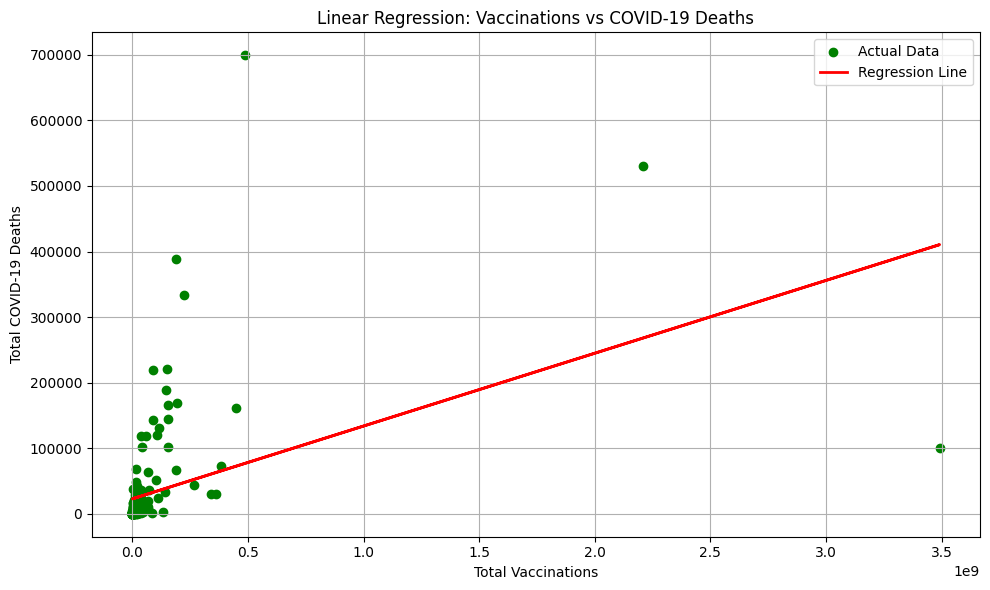

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load datasets
vacc_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

vacc_df = pd.read_csv(vacc_url)
deaths_df = pd.read_csv(deaths_url)

# Step 3: Prepare deaths data
deaths_df = deaths_df.drop(columns=['Province/State', 'Lat', 'Long'])
deaths_by_country = deaths_df.groupby('Country/Region').sum().reset_index()
deaths_by_country = deaths_by_country[['Country/Region', deaths_by_country.columns[-1]]]
deaths_by_country.columns = ['Country', 'Total_Deaths']

# Step 4: Prepare vaccination data (latest per country)
latest_vacc = vacc_df.sort_values('date').groupby('location').last().reset_index()
vacc_country = latest_vacc[['location', 'total_vaccinations']]
vacc_country.columns = ['Country', 'Total_Vaccinations']

# Step 5: Merge both datasets
merged = pd.merge(deaths_by_country, vacc_country, on='Country', how='inner').dropna()

# Step 6: Select independent (X) and dependent (y) variables
X = merged[['Total_Vaccinations']]
y = merged['Total_Deaths']

# Step 7: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Predict on test data
y_pred = model.predict(X_test)

# Step 10: Evaluate and visualize
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Scatter plot + regression line
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='green', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel("Total Vaccinations")
plt.ylabel("Total COVID-19 Deaths")
plt.title("Linear Regression: Vaccinations vs COVID-19 Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


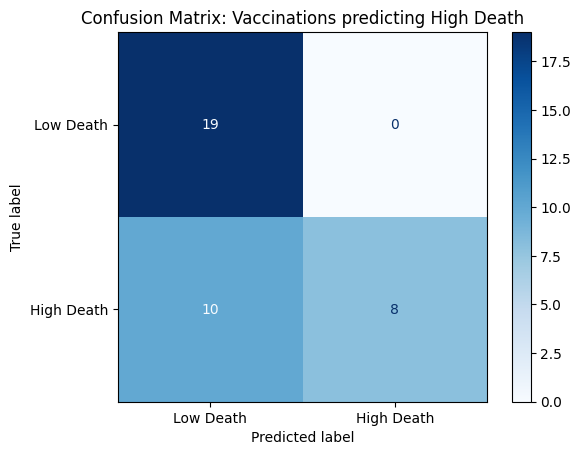

              precision    recall  f1-score   support

           0       0.66      1.00      0.79        19
           1       1.00      0.44      0.62        18

    accuracy                           0.73        37
   macro avg       0.83      0.72      0.70        37
weighted avg       0.82      0.73      0.71        37

The top left shows that the model predicted that there was 19 countries with low death that actually had low death. 
The bottom left shows that the model predicted that there was 10 countries with low death that actually had high death. 
The bottom right shows that the model predicted that there was 8 countries with high death that actually had high death. 
The bottom right shows that the model predicted that there was 0 countries with high death that actually had low death. 


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Load datasets
vacc_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

vacc_df = pd.read_csv(vacc_url)
deaths_df = pd.read_csv(deaths_url)

# Prepare deaths data
deaths_df = deaths_df.drop(columns=['Province/State', 'Lat', 'Long'])
deaths_by_country = deaths_df.groupby('Country/Region').sum().reset_index()
deaths_by_country = deaths_by_country[['Country/Region', deaths_by_country.columns[-1]]]
deaths_by_country.columns = ['Country', 'Total_Deaths']

# Prepare vaccination data (latest per country)
latest_vacc = vacc_df.sort_values('date').groupby('location').last().reset_index()
vacc_country = latest_vacc[['location', 'total_vaccinations']]
vacc_country.columns = ['Country', 'Total_Vaccinations']

# Merge datasets
merged = pd.merge(deaths_by_country, vacc_country, on='Country', how='inner').dropna()

# Create binary target variable: High death if deaths > median deaths
median_deaths = merged['Total_Deaths'].median()
merged['High_Death'] = (merged['Total_Deaths'] > median_deaths).astype(int)

# Independent and dependent variables
X = merged[['Total_Vaccinations']]
y = merged['High_Death']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Death', 'High Death'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Vaccinations predicting High Death")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))



print("The top left shows that the model predicted that there was 19 countries with low death that actually had low death. ")
print("The bottom left shows that the model predicted that there was 10 countries with low death that actually had high death. ")
print("The bottom right shows that the model predicted that there was 8 countries with high death that actually had high death. ")
print("The bottom right shows that the model predicted that there was 0 countries with high death that actually had low death. ")



Classification Report:

              precision    recall  f1-score   support

         Low       0.97      1.00      0.99        37
      Medium       0.00      0.00      0.00         1

    accuracy                           0.97        38
   macro avg       0.49      0.50      0.49        38
weighted avg       0.95      0.97      0.96        38



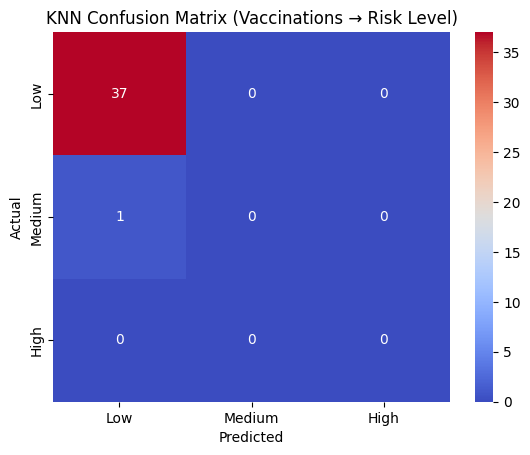

This model predicts that the risk level based on the vaccination would be low and it is actually low with 37 count.
This model predicts that the risk level based on the vaccination would be low and it is actually medium with 1 count.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the datasets
vacc_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vacc_df = pd.read_csv(vacc_url)

deaths_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_deaths.csv"
deaths_df = pd.read_csv(deaths_url)

cases_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_cases.csv"
cases_df = pd.read_csv(cases_url)

# Step 2: Get latest values for each
latest_vacc = vacc_df.groupby('location')['total_vaccinations'].max().reset_index()
latest_cases = cases_df.set_index('date').iloc[-1].reset_index()
latest_cases.columns = ['location', 'total_cases']
latest_deaths = deaths_df.set_index('date').iloc[-1].reset_index()
latest_deaths.columns = ['location', 'total_deaths']

# Merge data
df = pd.merge(latest_cases, latest_deaths, on='location')
df = pd.merge(df, latest_vacc, on='location')
df = df.dropna()

# Step 3: Create death rate and classify risk
df['death_rate'] = df['total_deaths'] / df['total_cases']

def classify_risk(rate):
    if rate > 0.05:
        return 'High'
    elif rate > 0.01:
        return 'Medium'
    else:
        return 'Low'

df['risk_level'] = df['death_rate'].apply(classify_risk)

# Step 4: Define features (only vaccination) and labels
X = df[['total_vaccinations']]
y = df['risk_level']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Step 8: Predict and evaluate
y_pred = knn.predict(X_test_scaled)

# Print evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Low', 'Medium', 'High'])

# Plot
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'],
            cmap='coolwarm')
plt.title("KNN Confusion Matrix (Vaccinations → Risk Level)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("This model predicts that the risk level based on the vaccination would be low and it is actually low with 37 count.")
print("This model predicts that the risk level based on the vaccination would be low and it is actually medium with 1 count.")


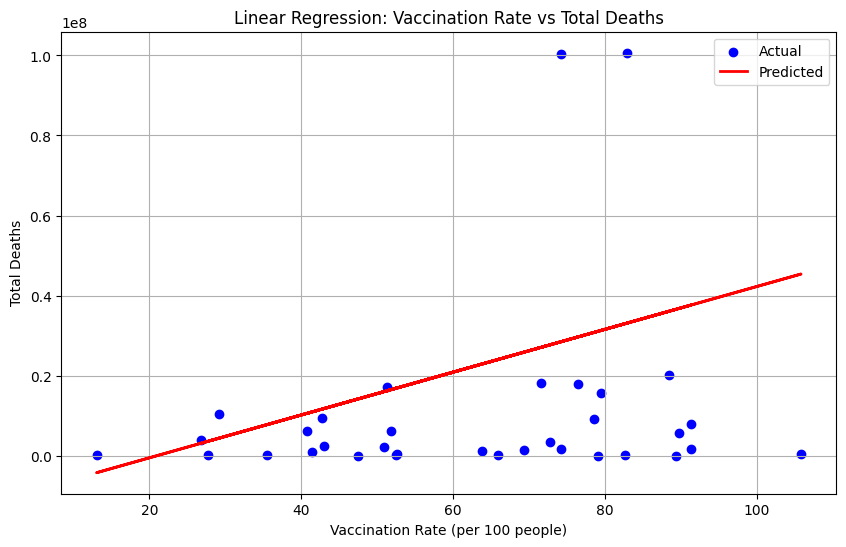

Root Mean Squared Error (RMSE): 26451846.40
R-squared Score (R²): -0.30
This shows that the model did not predict a good line and the dots are all over the place. This model is no better than the horizontal line


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the data
url_vax = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vax_df = pd.read_csv(url_vax)

url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
deaths_df = pd.read_csv(url_deaths)

# Step 3: Preprocess deaths data to get total deaths by country
deaths_df = deaths_df.drop(columns=['Province/State', 'Lat', 'Long'])
deaths_total = deaths_df.groupby('Country/Region').sum().reset_index()
deaths_total['total_deaths'] = deaths_total.iloc[:, 1:].sum(axis=1)
deaths_total = deaths_total[['Country/Region', 'total_deaths']]

# Step 4: Get the latest vaccination data by country
vax_latest = vax_df.sort_values('date').drop_duplicates('location', keep='last')
vax_latest = vax_latest[['location', 'people_vaccinated_per_hundred']]
vax_latest = vax_latest.rename(columns={'location': 'Country/Region', 'people_vaccinated_per_hundred': 'vaccination_rate'})

# Step 5: Merge the data
df = pd.merge(deaths_total, vax_latest, on='Country/Region')
df = df.dropna()

# Step 6: Select variables
X = df[['vaccination_rate']]  # independent variable
y = df['total_deaths']        # dependent variable

# Step 7: Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Predict and evaluate
y_pred = model.predict(X_test)

# Manually compute RMSE since squared=False might not be supported
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Step 10: Visualize
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Vaccination Rate (per 100 people)')
plt.ylabel('Total Deaths')
plt.title('Linear Regression: Vaccination Rate vs Total Deaths')
plt.legend()
plt.grid(True)
plt.show()

# Step 11: Print Evaluation Metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")
print("This shows that the model did not predict a good line and the dots are all over the place. This model is no better than the horizontal line")


Model Performance:
Root Mean Squared Error: 23876.71
R² Score: -2279.39


<Figure size 1000x600 with 0 Axes>

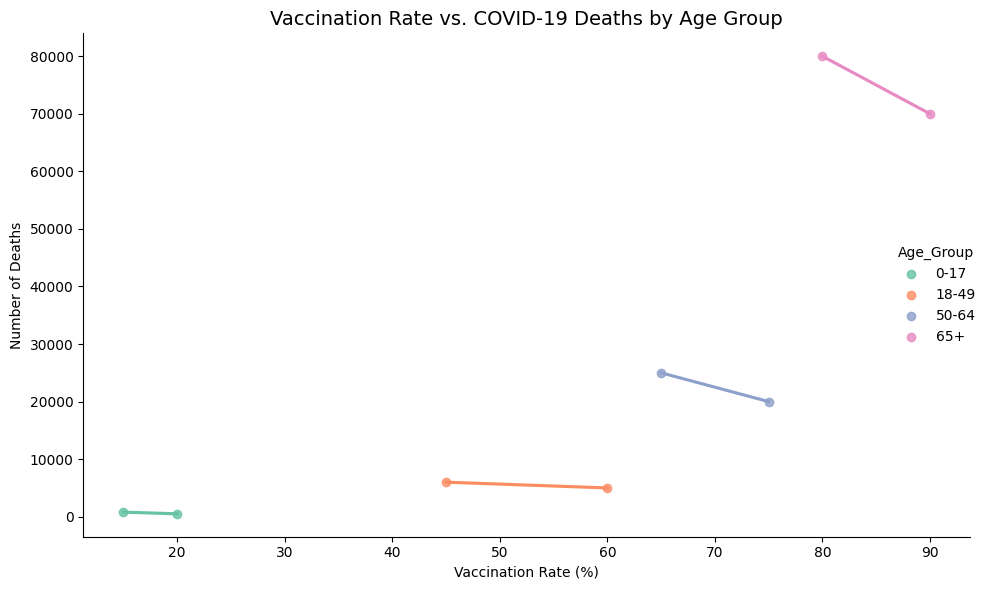

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load sample dataset (replace with real data if you have it)
data = {
    'Country': ['USA', 'USA', 'USA', 'USA', 'India', 'India', 'India', 'India'],
    'Age_Group': ['0-17', '18-49', '50-64', '65+', '0-17', '18-49', '50-64', '65+'],
    'Vaccination_Rate': [20, 60, 75, 90, 15, 45, 65, 80],  # %
    'Deaths': [500, 5000, 20000, 70000, 800, 6000, 25000, 80000]  # absolute count
}

df = pd.DataFrame(data)

# Step 3: Choose features and target variable
X = df[['Vaccination_Rate']]
y = df['Deaths']

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 5: Initialize model
model = LinearRegression()

# Step 6: Fit the model
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


# Step 8: Visualization (with regression lines by age group)
plt.figure(figsize=(10, 6))
sns.lmplot(
    data=df,
    x='Vaccination_Rate',
    y='Deaths',
    hue='Age_Group',
    aspect=1.5,
    height=6,
    markers='o',
    palette='Set2',
    ci=None
)

plt.title('Vaccination Rate vs. COVID-19 Deaths by Age Group', fontsize=14)
plt.xlabel('Vaccination Rate (%)')
plt.ylabel('Number of Deaths')
plt.tight_layout()
plt.show()


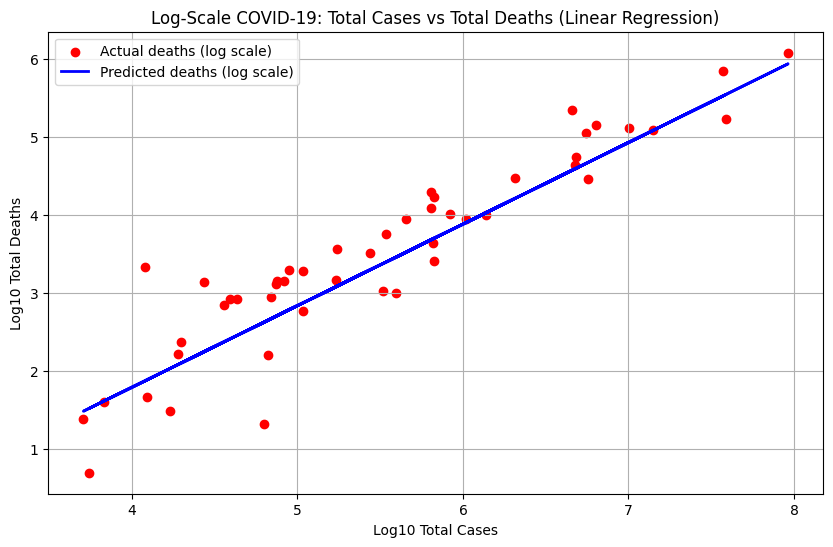

Model Evaluation Metrics (Log-Scale):
Root Mean Squared Error (RMSE): 0.4767
R² Score: 0.8480
This shows that the model did predict a good line as the line touches most of the dots that are present 


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the data
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Step 3: Choose your variables (EDA)
df = df[['location', 'total_cases', 'total_deaths']].dropna()

# Filter out zeros because log(0) is undefined
df = df[(df['total_cases'] > 0) & (df['total_deaths'] > 0)]

# Optional: group by location to get latest totals per country
df = df.groupby('location').max().reset_index()

# Step 4: Define independent and dependent variables (use log)
X = np.log10(df[['total_cases']])
y = np.log10(df['total_deaths'])

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize model
model = LinearRegression()

# Step 7: Fit the model
model.fit(X_train, y_train)

# Step 8: Predict
y_pred = model.predict(X_test)

# Step 9: Plot with log scale
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual deaths (log scale)')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted deaths (log scale)')
plt.xlabel('Log10 Total Cases')
plt.ylabel('Log10 Total Deaths')
plt.title('Log-Scale COVID-19: Total Cases vs Total Deaths (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics (Log-Scale):")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

print("This shows that the model did predict a good line as the line touches most of the dots that are present ")


RMSE (log scale): 0.436736308840195
R² (log scale): 0.8546601790392923


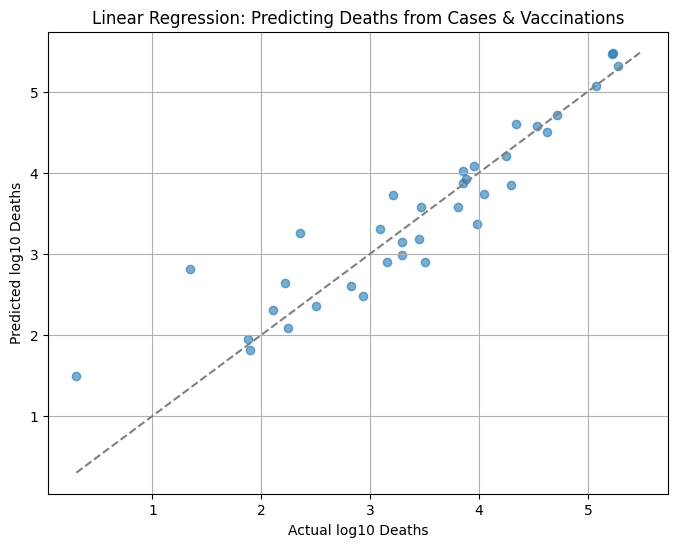

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# --- Step 1: Load datasets ---
# Total confirmed cases
cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
vacc_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"

cases_df = pd.read_csv(cases_url)
deaths_df = pd.read_csv(deaths_url)
vacc_df = pd.read_csv(vacc_url, usecols=["location", "total_vaccinations", "date"])

# --- Step 2: Aggregate cases and deaths by country ---
cases_total = cases_df.drop(columns=["Province/State", "Lat", "Long"]).groupby("Country/Region").sum().iloc[:, -1]
deaths_total = deaths_df.drop(columns=["Province/State", "Lat", "Long"]).groupby("Country/Region").sum().iloc[:, -1]

# --- Step 3: Get latest vaccination totals per country ---
vacc_latest = vacc_df.sort_values("date").dropna(subset=["total_vaccinations"])
vacc_latest = vacc_latest.groupby("location").last()["total_vaccinations"]

# --- Step 4: Merge all data ---
df = pd.DataFrame({
    "Cases": cases_total,
    "Deaths": deaths_total
}).reset_index().rename(columns={"Country/Region": "Country"})

df = df.merge(vacc_latest.reset_index().rename(columns={"location": "Country", "total_vaccinations": "Vaccinations"}), on="Country", how="inner")

# Remove any rows with zero or missing values
df = df[(df["Cases"] > 0) & (df["Vaccinations"] > 0) & (df["Deaths"] > 0)]

# --- Step 5: Prepare features and target ---
X = df[["Cases", "Vaccinations"]]
y = df["Deaths"]

# Optional: log transform
X = np.log10(X + 1)
y = np.log10(y + 1)

# --- Step 6: Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 7: Train model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Step 8: Evaluate model ---
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE (log scale):", rmse)
print("R² (log scale):", r2)

# --- Step 9: Plot actual vs predicted ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='gray')
plt.xlabel("Actual log10 Deaths")
plt.ylabel("Predicted log10 Deaths")
plt.title("Linear Regression: Predicting Deaths from Cases & Vaccinations")
plt.grid(True)
plt.show()


Final dataset shape: (220, 5)
RMSE: 0.01
R² Score: 1.000


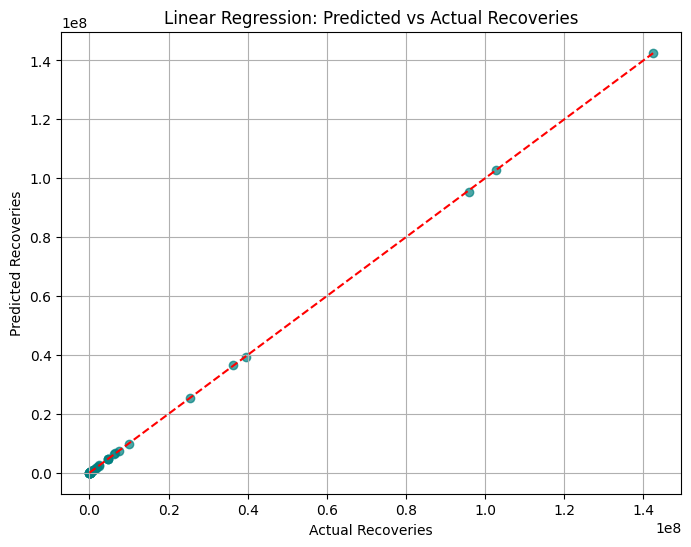

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load datasets
cases_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/total_cases.csv"
deaths_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/total_deaths.csv"
vacc_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"

cases_df = pd.read_csv(cases_url)
deaths_df = pd.read_csv(deaths_url)
vacc_df = pd.read_csv(vacc_url)

# Get the latest total cases and deaths per country
latest_cases = cases_df.set_index("date").iloc[-1].reset_index()
latest_deaths = deaths_df.set_index("date").iloc[-1].reset_index()

latest_cases.columns = ['Country', 'Cases']
latest_deaths.columns = ['Country', 'Deaths']

# Estimate recoveries
merged_df = pd.merge(latest_cases, latest_deaths, on='Country')
merged_df["Recoveries"] = merged_df["Cases"] - merged_df["Deaths"]

# Get latest total vaccinations per country
latest_vacc = vacc_df.groupby('location')['total_vaccinations'].max().reset_index()
latest_vacc.columns = ["Country", "Vaccinations"]

# Merge everything
df = pd.merge(merged_df, latest_vacc, on='Country')
df = df.dropna()
df = df[(df["Cases"] > 0) & (df["Vaccinations"] > 0) & (df["Recoveries"] > 0)]

# Check how many countries are included
print("Final dataset shape:", df.shape)

# Features and target
X = df[["Cases", "Vaccinations"]]
y = df["Recoveries"]

# Log transform for stability (optional)
X_log = np.log1p(X)
y_log = np.log1p(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Reverse log transform for real-world interpretation
y_pred_real = np.expm1(y_pred)
y_test_real = np.expm1(y_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test_real, y_pred_real)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, y_pred_real, alpha=0.7, color='teal')
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--')
plt.xlabel("Actual Recoveries")
plt.ylabel("Predicted Recoveries")
plt.title("Linear Regression: Predicted vs Actual Recoveries")
plt.grid(True)
plt.show()


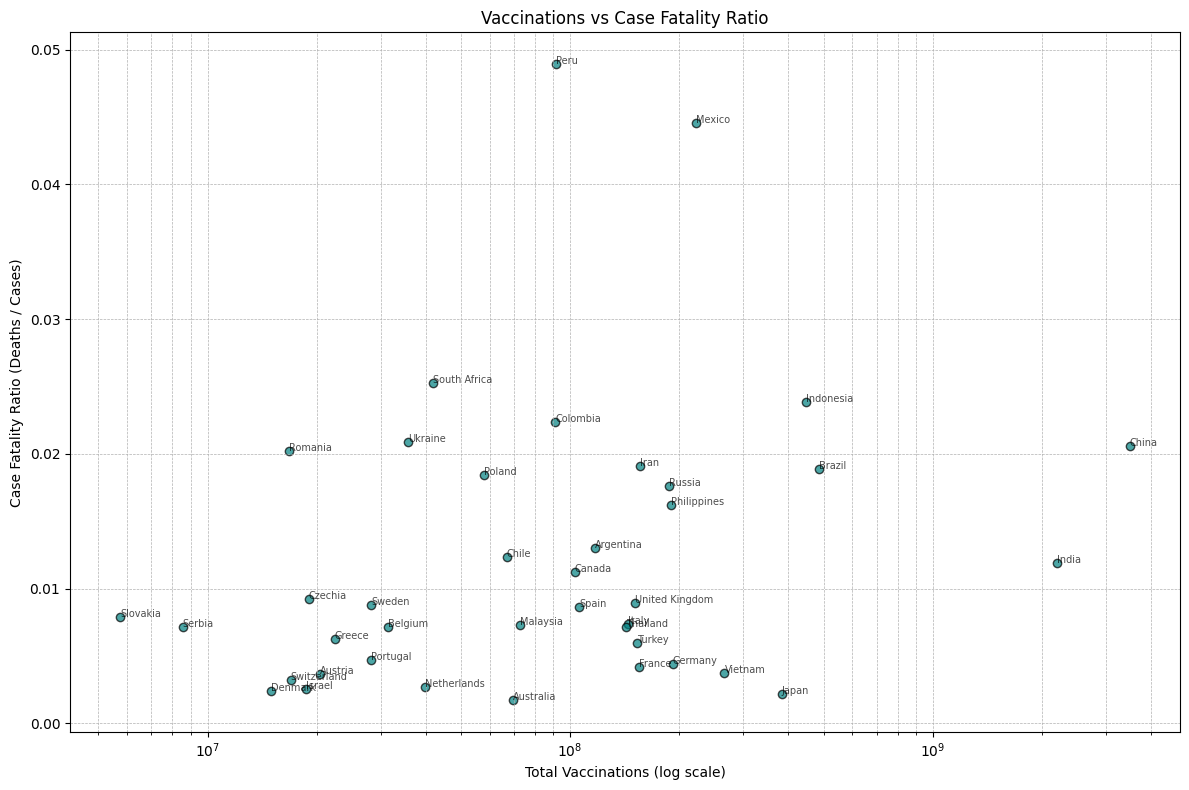

Pearson r = 0.14, p-value = 0.3848


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings

warnings.filterwarnings('ignore')

# --- Load data ---
url_vaccinations = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vaccination_df = pd.read_csv(url_vaccinations)

url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
deaths_df = pd.read_csv(url_deaths)

url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
cases_df = pd.read_csv(url_confirmed)

# --- Clean deaths and cases ---
deaths_df = deaths_df.drop(columns=['Lat', 'Long']).groupby('Country/Region').sum()
cases_df = cases_df.drop(columns=['Lat', 'Long']).groupby('Country/Region').sum()

deaths_df = deaths_df[[deaths_df.columns[-1]]].reset_index().rename(columns={
    deaths_df.columns[-1]: 'Deaths',
    'Country/Region': 'Country'
})
cases_df = cases_df[[cases_df.columns[-1]]].reset_index().rename(columns={
    cases_df.columns[-1]: 'Cases',
    'Country/Region': 'Country'
})

# --- Clean vaccination data ---
vax_df = vaccination_df.groupby('location')['total_vaccinations'].max().reset_index()
vax_df.columns = ['Country', 'Vaccinations']

# --- Merge data ---
df = pd.merge(pd.merge(cases_df, deaths_df, on='Country'), vax_df, on='Country')
df = df.sort_values(by='Cases', ascending=False).head(40)

# --- Calculate Case Fatality Ratio ---
df['CFR'] = df['Deaths'] / df['Cases']
df = df[df['Cases'] > 0]  # Avoid divide-by-zero

# --- Drop NaNs ---
df = df.dropna(subset=['Vaccinations', 'CFR'])

# --- Correlation ---
r, p = pearsonr(df['Vaccinations'], df['CFR'])

# --- Plot ---
plt.figure(figsize=(12, 8))
plt.scatter(df['Vaccinations'], df['CFR'], alpha=0.7, color='teal', edgecolors='black')
for _, row in df.iterrows():
    plt.text(row['Vaccinations'], row['CFR'], row['Country'], fontsize=7, alpha=0.7)

plt.xscale('log')
plt.xlabel('Total Vaccinations (log scale)')
plt.ylabel('Case Fatality Ratio (Deaths / Cases)')
plt.title('Vaccinations vs Case Fatality Ratio')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# --- Print correlation result ---
print(f"Pearson r = {r:.2f}, p-value = {p:.4f}")
